In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,date_id,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V3,V4,V5,V6,V7,V8,V9,forward_returns,risk_free_rate,market_forward_excess_returns
0,0,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002421,0.000301,-0.003038
1,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008495,0.000303,-0.009114
2,2,0,0,0,1,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009624,0.000301,-0.010243
3,3,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004662,0.000299,0.004046
4,4,0,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011686,0.000299,-0.012301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,8985,0,0,0,0,0,0,0,0,0,...,0.469577,0.837963,1.226772,0.822751,-0.707361,0.142857,-0.649616,0.002457,0.000155,0.001990
8986,8986,0,0,0,0,0,0,0,0,0,...,0.671958,0.837963,0.785877,0.805556,-0.715692,0.196098,-0.668289,0.002312,0.000156,0.001845
8987,8987,0,0,1,0,0,0,0,0,0,...,0.481481,0.787698,0.834898,0.823413,-0.723949,0.133929,-0.670946,0.002891,0.000156,0.002424
8988,8988,0,0,0,0,0,0,0,0,0,...,0.655423,0.783730,0.994026,0.851852,-0.684937,0.101852,-0.646265,0.008310,0.000156,0.007843


<Axes: >

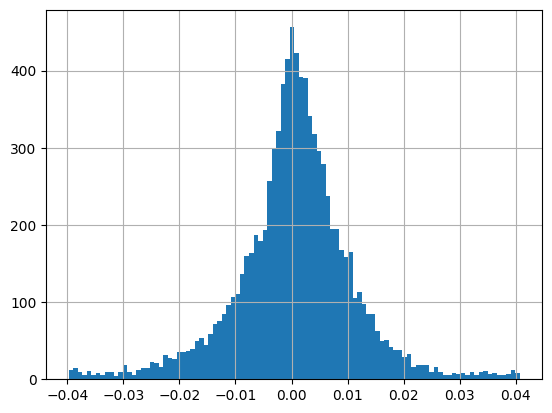

In [4]:
train['forward_returns'].hist(bins = 100)

In [5]:
log_returns = np.log(1+train['market_forward_excess_returns'])

<Axes: >

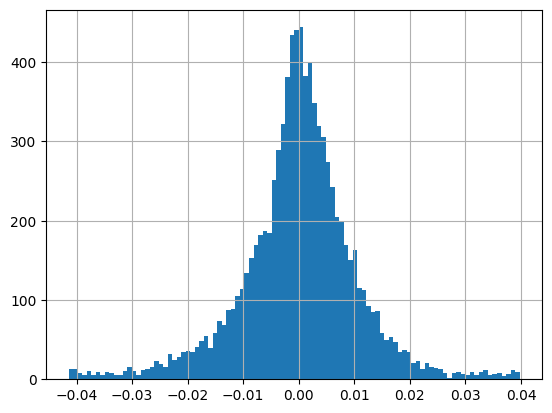

In [6]:
log_returns.hist(bins = 100)

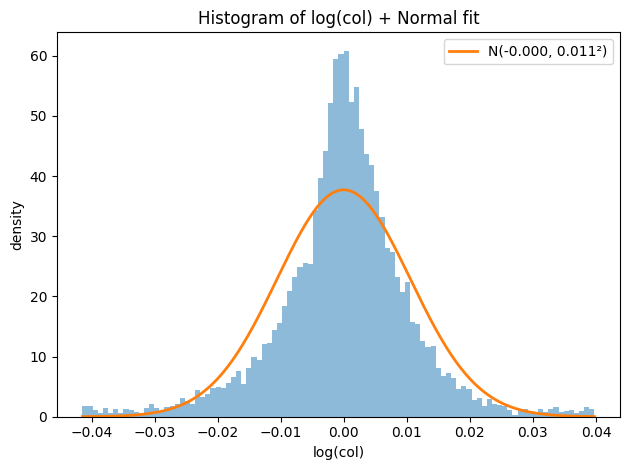

In [7]:
mu, sigma = stats.norm.fit(log_returns)       # fit N(mu, sigma^2) to log data
plt.figure()
plt.hist(log_returns, bins=100, density=True, alpha=0.5)
yy = np.linspace(log_returns.min(), log_returns.max(), 400)
plt.plot(yy, stats.norm.pdf(yy, mu
, sigma), linewidth=2, label=f"N({mu:.3f}, {sigma:.3f}²)")
plt.xlabel("log(col)")
plt.ylabel("density")
plt.title("Histogram of log(col) + Normal fit")
plt.legend()
plt.tight_layout()
plt.show()

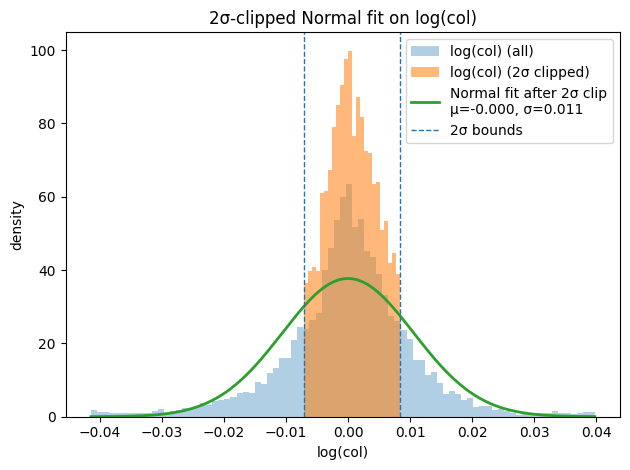

In [8]:
y_clip, low, high = stats.sigmaclip(log_returns, low=2.0, high=2.0)
mu, sigma = stats.norm.fit(log_returns)       # fit N(mu, sigma^2) to log data
plt.figure()
plt.hist(log_returns, bins="auto", density=True, alpha=0.35, label="log(col) (all)")
plt.hist(y_clip, bins="auto", density=True, alpha=0.55, label="log(col) (2σ clipped)")
yy = np.linspace(min(log_returns.min(), y_clip.min()), max(log_returns.max(), y_clip.max()), 400)
plt.plot(yy, stats.norm.pdf(yy, mu, sigma), linewidth=2,
         label=f"Normal fit after 2σ clip\nμ={mu:.3f}, σ={sigma:.3f}")
plt.axvline(low, linestyle="--", linewidth=1, label="2σ bounds")
plt.axvline(high, linestyle="--", linewidth=1)
plt.xlabel("log(col)"); plt.ylabel("density"); plt.title("2σ-clipped Normal fit on log(col)")
plt.legend(); plt.tight_layout(); plt.show()

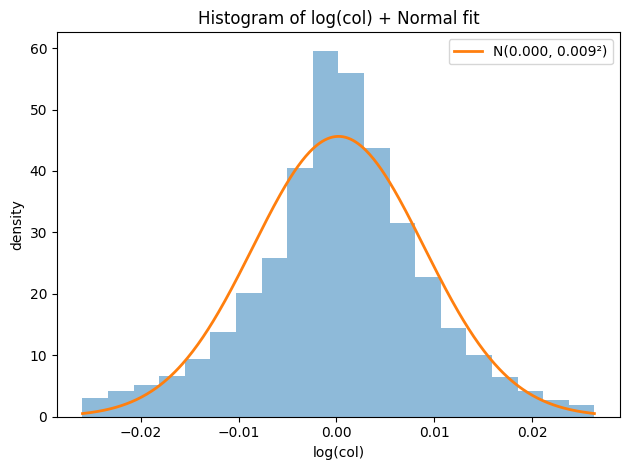

In [9]:
y_clip, low, high = stats.sigmaclip(log_returns, low=3.0, high=3.0)
mu, sigma = stats.norm.fit(y_clip)       # fit N(mu, sigma^2) to log data
plt.figure()
plt.hist(y_clip, bins=20, density=True, alpha=0.5)
yy = np.linspace(y_clip.min(), y_clip.max(), 400)
plt.plot(yy, stats.norm.pdf(yy, mu
, sigma), linewidth=2, label=f"N({mu:.3f}, {sigma:.3f}²)")
plt.xlabel("log(col)")
plt.ylabel("density")
plt.title("Histogram of log(col) + Normal fit")
plt.legend()
plt.tight_layout()
plt.show()